In [ ]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
df_wine.columns = ["class","alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium","total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins","color_intensity", "hue", "od280_od315", "proline"]
from sklearn.model_selection import train_test_split
X = df_wine.iloc[:,1:].values
Y = df_wine.iloc[:,0].values

x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state= 2, stratify= Y)

from sklearn.preprocessing import StandardScaler

SSC = StandardScaler()
x_train_std = SSC.fit_transform(x_train)
x_test_std = SSC.transform(x_test)


Eigen calculation:
Note:
The eigenvectors of the covariance matrix represent the principal components (the directions of maximum variance), whereas the corresponding eigenvalues will define their magnitude

You can find more information here: 
https://www.geeksforgeeks.org/engineering-mathematics/eigen-values/

In [2]:
import numpy as np
cov_mar = np.cov(x_test_std.T)
#Cov_mar is covelance matrix
eigen_val, eigen_vect = np.linalg.eig(cov_mar)

print(f"The eigen values is {eigen_val}")

# Using the linalg.eig function, we performed the eigendecomposition, which yielded a vector (eigen_vals) consisting of 13 eigenvalues and the corresponding eigenvectors stored as columns in a 13×13-dimensional matrix (eigen_vecs).


The eigen values is [4.69617259 2.43379112 1.3312977  1.20534756 1.08670023 0.82307954
 0.48817524 0.33663549 0.27511355 0.10189091 0.11482066 0.18272328
 0.16290498]


Total_explained Variance
 The variance explained ratio of an eigenvalue, , is simply the fraction of an eigenvalue, , and the total sum of the eigenvalues

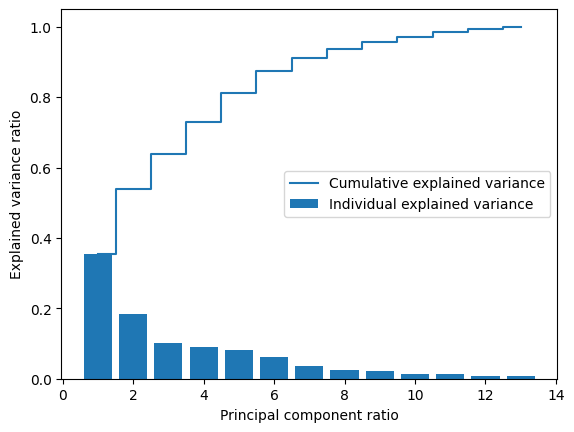

In [3]:
ror = sum(eigen_val)

var_exp = [(i/ror) for i in sorted(eigen_val, reverse = True)]
cum_VAR_EXP = np.cumsum(var_exp)
# cum_VAR_EXP IT CALCULATES THE CUMMULATIVE SUM

import matplotlib.pyplot as plt

plt.bar(range(1,14), var_exp, align = 'center', label = 'Individual explained variance' )
plt.step(range(1,14), cum_VAR_EXP, where = 'mid', label = 'Cumulative explained variance')

plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component ratio")
plt.legend(loc ='best')


# FEATURE TRANSFORMATION


In [4]:
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vect[:,i]) for i in range(len(eigen_val))]

eigen_pairs.sort(key = lambda k: k[0], reverse = True)

w= np.hstack((eigen_pairs[0][1][:,np.newaxis], eigen_pairs[1][1][:,np.newaxis]))

print(w)


[[ 0.08155853  0.47707632]
 [-0.36426147  0.16845319]
 [-0.04194977  0.32375653]
 [-0.21100161  0.05263811]
 [ 0.100618    0.11932733]
 [ 0.33877656  0.17184788]
 [ 0.43056285  0.1415314 ]
 [-0.23053353 -0.03864056]
 [ 0.29951788  0.02495344]
 [-0.18249799  0.55577812]
 [ 0.35530674 -0.24630472]
 [ 0.37465381 -0.05755492]
 [ 0.24765273  0.44457522]]


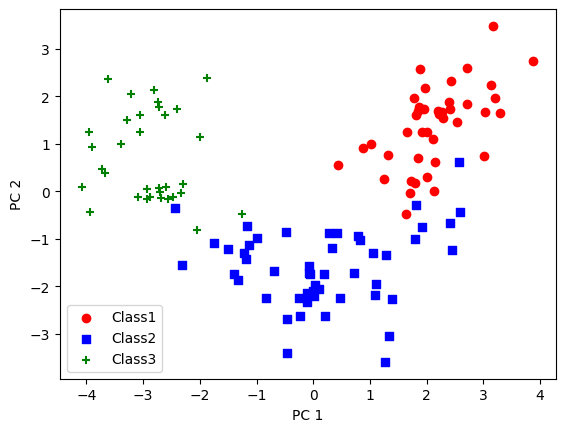

In [5]:
x_train_pca = x_train_std.dot(w)
color = ("r","b","g")
markers = ("o","s","+")

for l,c,m in zip(np.unique(y_train), color, markers):
    plt.scatter(x_train_pca[y_train==l,0], x_train_pca[y_train==l,1], c = c, label = f"Class{l}", marker= m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'best')


# Principal component analysis in scikit-learn

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_Decision(x,y,classifire, resolution = 0.02):
    markers = "o","*","s","d"
    colors = ("blue","green","red","yellow")
    cmap = ListedColormap(colors[:len(np.unique(y))]) # Creaye a unique color for each value Y



    x_min, x_max =(x[:,0].min()-1,x[:,0].max() + 1) #Padding
    x1_min,x2_max = (x[:,1].min() - 1, x[:,1].max() + 1)    
    xx1,xx2 = np.meshgrid(np.arange(x_min,x_max,resolution), np.arange(x1_min,x2_max,resolution)) #Np.arreange(start, stop,increment)
    #meshgrid converts from 1D to ND(2)

    lab = classifire.predict(np.array([xx1.ravel(),  xx2.ravel()]).T) # ravel flatens the values , T is transpose
    lab = lab.reshape(xx1.shape) # xx1 have same shape as xx2

    plt.contourf(xx1,xx2,lab, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0], y = x[y == cl,1 ], color = colors[idx], marker = markers[idx],label = f"class{cl}" ,edgecolor = "black")

c:\Users\Aron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


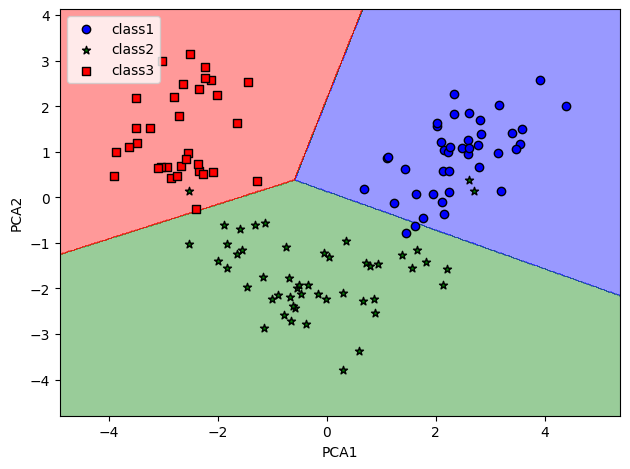

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components= 2) # converting to 2d

log_ref = LogisticRegression(multi_class= 'auto', random_state= 42, solver= 'lbfgs')

x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

log_ref.fit(x_train_pca, y_train)

plot_Decision(x_train_pca,y_train, classifire= log_ref)
plt.xlabel("PCA1")
plt.ylabel("PCA2")

plt.legend(loc='best')
plt.tight_layout()



To find the correlation between the original features and principal component ; we can scale the eigen vectors by sqrt of eigen values

(-1.0, 1.0)

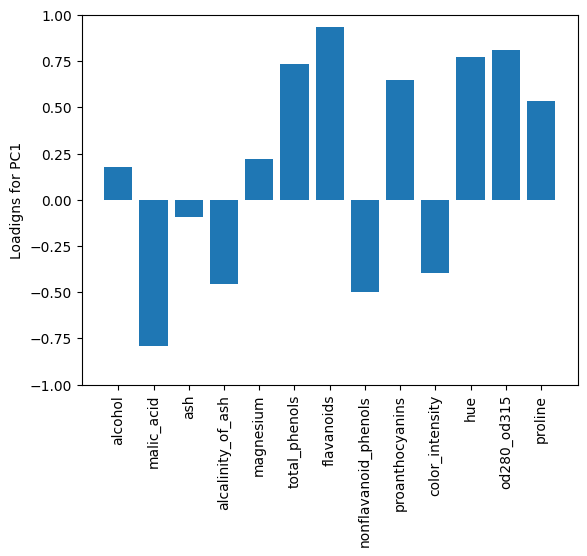

In [28]:
loadings = eigen_vect *np.sqrt(eigen_val)
df_wine.columns = ["class","alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium","total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins","color_intensity", "hue", "od280_od315", "proline"]


fig,ax = plt.subplots()
ax.bar(range(13), loadings[:,0], align = 'center')
ax.set_ylabel("Loadigns for PC1")

ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation = 90)
plt.ylim([-1,1])




## Supervised data compression via linear discriminant analysis